In [10]:
import re
import os
import pathlib
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Root of the project
project_dir = pathlib.Path().resolve().parent

# Directory containing experiment results
results_dir = (pathlib.Path(project_dir) / "results").resolve()

# Directory for tidied data (output directory)
data_dir = (pathlib.Path(project_dir) / "data").resolve()

# Directory to store all plots
plot_dir = (pathlib.Path(project_dir) / "plots").resolve()


# Experiment constants
exp_name = "04_grpc_max_throughput"
file_prefix = "exp-04"

In [2]:
"""Load cleaned/aggregated data sets

resource_df -> CPU/Mem utilization for experiments
fortio_df -> Load test results from fortio
"""

# resource_df = pd.read_feather(data_dir / "resource_results.feather")
fortio_df = pd.read_feather(data_dir / "fortio_results.feather")

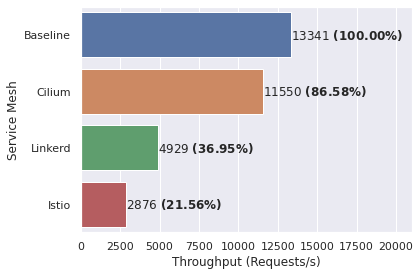

In [16]:
"""
PLOT: Bar Chart
Goal: Show maximum throughput per service mesh
"""

file_name = f"{file_prefix}-max-throughput.pdf"

data =  fortio_df[fortio_df["experiment"] == exp_name]
data = data.sort_values("actual_qps", ascending=False)


fig, ax = plt.subplots()
ax = sns.barplot(data=data, x="actual_qps", y="mesh", ax=ax)

ax.set_xlim(0, 21000)


# # Show numbers on top of bars
labels = [f"{x:.0f} $\\bf({x / data['actual_qps'].max() * 100:.2f}\%)$" for x in data["actual_qps"]]

ax.bar_label(ax.containers[0], labels=labels, label_type="edge")


ax.set_xlabel("Throughput (Requests/s)")
ax.set_ylabel("Service Mesh")
# ax.set_title("Average Throughput vs Service Mesh")

fig.tight_layout()
fig.savefig(plot_dir / file_name)
